# Credit Card Fraud Detection

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Important-libraries" data-toc-modified-id="Important-libraries-0">Important libraries</a></span></li><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1">Loading data</a></span></li><li><span><a href="#Analyzing-our-data" data-toc-modified-id="Analyzing-our-data-2">Analyzing our data</a></span></li><li><span><a href="#Traditional-way-of-catching-fraud" data-toc-modified-id="Traditional-way-of-catching-fraud-3">Traditional way of catching fraud</a></span></li><li><span><a href="#Logistic-Regression-with-imbalance-data" data-toc-modified-id="Logistic-Regression-with-imbalance-data-4">Logistic Regression with imbalance data</a></span></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-5">SMOTE</a></span></li><li><span><a href="#Logistic-Regressionn-combined-with-SMOTE" data-toc-modified-id="Logistic-Regressionn-combined-with-SMOTE-6">Logistic Regressionn combined with SMOTE</a></span></li></ul></div>

## Important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline 

## Loading data

In [2]:

df=pd.read_csv("Data/creditcard/creditcard.csv")
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Analyzing our data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#We do not need the feature "Time" for this analysis, so I will delete it
df=df.drop(columns=['Time'])

In [5]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
#Do we have any missing value?
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 the feature "Class" is our target variable. This variable has two possible values: 
 1 for fraudulent transactions and 0 for no fraudulent transactions. 
A very commun problem in classification datasets is classs imbalance. This means that the dataset contains an imbalance number of fraudulents and no-fraudulents transactions. ML algorithms works better when the different classes are equally represented  

In [7]:
vc_df=df['Class'].value_counts()
vc_df

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#ratio of fraudulent transactions
vc_df/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

We can see that fraudulent transactions represent only 0.1727% of our datasets meanwhile non-fraudulent transactions respresent 0.998273%.
it is confirmed we have class imbalance in our dataset. 
 


A good starting point, especially in fraud analysis, is visualizing your data before making any changes. Here we will visualize our fraud and non-fraud ratio. 


In [9]:

X=df.iloc[:,1:29].values


In [10]:
y=df.Class.values

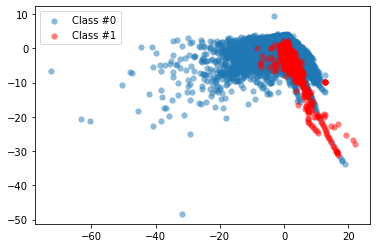

In [11]:

def plot_data(X, y):
	plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
	plt.legend()
	return plt.show()
# Create X and y from the prep_data function 
#X, y = prep_data(df)


# Plot our data
plot_data(X,y)

The plot helps us to see the data imbalance problem very clear. 

## Traditional way of catching fraud
First you'll define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. This is common practice within fraud analytics teams.

Statistical thresholds are often determined by looking at the mean values of observations. Let's start this exercise by checking whether feature means differ between fraud and non-fraud cases. Then, you'll use that information to create common sense thresholds. Finally, you'll check how well this performs in fraud detection.


In [12]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

In [14]:
# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud       0     1
Actual Fraud               
0              283089  1226
1                 322   170


With this first approach we have detected 170 of 492 fraudulent cases, but we got 1226 false positives. Now we will see how we can improve these numbers with ML

## Logistic Regression with imbalance data

In [15]:
#Create training and test set (XY split)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1000)

In [16]:
#Define our model
model=LogisticRegression()

In [17]:
#fit our the model with our training set
model.fit(X_train,y_train)

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# Get predicting values
predicted=model.predict(X_test)

Confusion matrix for the train set
[[85273    18]
 [   61    91]]


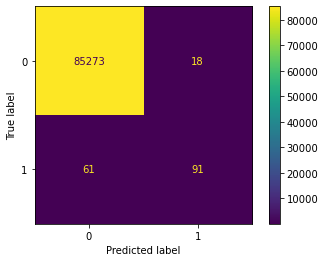

In [19]:
#print confussion matrix for the training set
print("Confusion matrix for the train set")
print(confusion_matrix(y_test,predicted))
plot_confusion_matrix(model,X_test,y_test, values_format = 'd')
plt.show()


In [20]:
#print classification report for the training set
print("Classification report for the train set")
print(classification_report(y_test,predicted))

Classification report for the train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.83      0.60      0.70       152

    accuracy                           1.00     85443
   macro avg       0.92      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



We can see some improvement in our model compared with the "old way" method:
    - We have reduced the number of False Possitive
    - We have increaded the percentages of fraud cases. 
Important Note: The confussion matrix of our Linear Regression model has only a few obersations because we use the test set (30% of the total dataset)

## SMOTE

We will use SMOTE to fix it. SMOTE creates new, synthetic samples that are quite similarto the existing observations in the minority class.  

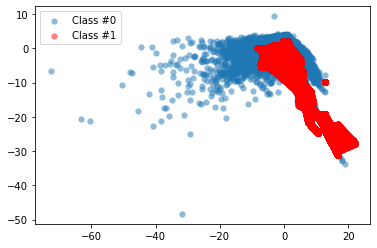

In [21]:

#1:Define the resampling method. 
method = SMOTE(random_state=42)
X_sm, y_sm  = method.fit_resample(X, y)
plot_data(X_sm, y_sm )


Minority class has a higher representation in our plot. 
Let's compare the SMOTE to our original data and see what happened with the number of observations of our minority classf. 

In [22]:
# class Values of our original dataset
pd.value_counts(pd.Series(y))

0    284315
1       492
dtype: int64

In [23]:
# Class vaules with SMOTE
pd.value_counts(pd.Series(y_sm))

0    284315
1    284315
dtype: int64

We have fixes data imbalance. 


## Logistic Regressionn combined with SMOTE

We will use a Pipeline to combine the resampling method with the Lineal Regression model

In [24]:
# Define the resampling method:
resampling=SMOTE()

#Define the model:
model= LogisticRegression()

In [25]:
#Define the pipeline. Here we combine the SMOTE with the logistic regression:
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [26]:
#Create training and test set (XY split):
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1000)

In [27]:
##fit our pipeline with our training set
pipeline.fit(X_train,y_train)

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('SMOTE', SMOTE()),
                ('Logistic Regression', LogisticRegression())])

In [28]:
# Get predicting values
predicted=pipeline.predict(X_test)

Confusion matrix for the train set
[[83758  1533]
 [   20   132]]


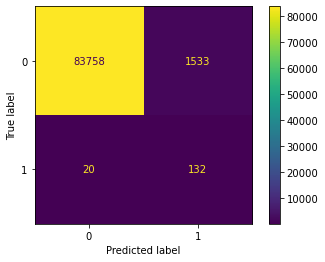

In [29]:
#print confussion matrix for the training set
print("Confusion matrix for the train set")
print(confusion_matrix(y_test,predicted))
plot_confusion_matrix(model,X_test,y_test, values_format = 'd')
plt.show()

In [30]:
#print classification report for the training set
print("Classification report for the train set")
print(classification_report(y_test,predicted))

Classification report for the train set
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85291
           1       0.08      0.87      0.15       152

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443



To combine logistic regression with SMOTE improves our results in terms of fraud detection. Now we get 132 of 152 cases. However the number of false positives increases drastically. 